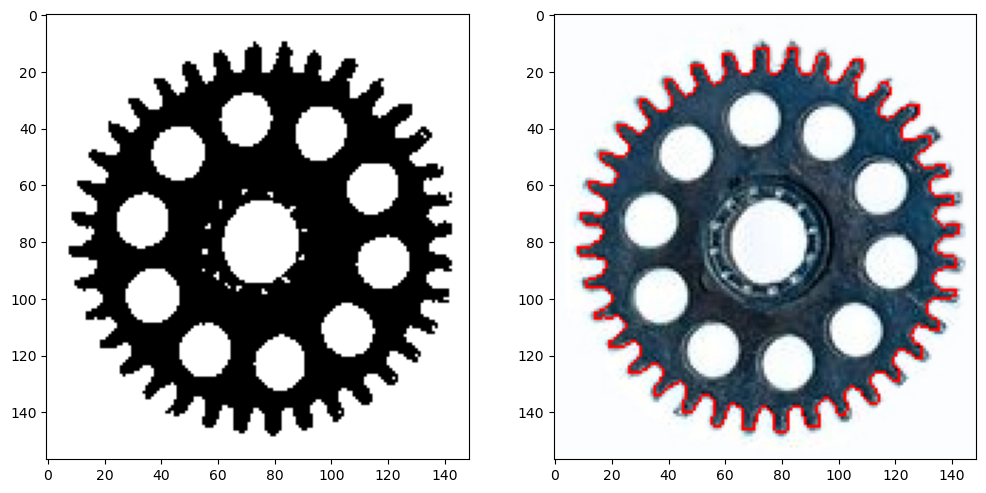

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


trybik = cv2.imread('trybik.jpg')
def draw_contours(img):
    imgG = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgG, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), 
        np.uint8))
    closed_not = cv2.bitwise_not(closed)


    contours, hierarchy = cv2.findContours(closed_not, cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_NONE)

    cv2.drawContours(img, contours[0], -1, (255, 0, 0))

    f, ax =plt.subplots(1, 2, figsize=(12, 8))
    ax[0].imshow(thresh, 'gray')
    ax[1].imshow(img)

draw_contours(trybik)

In [44]:
import numpy as np

def get_gradients(imgGray):
    sobelx = cv2.Sobel(imgGray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(imgGray, cv2.CV_64F, 0, 1, ksize=5)
    return sobelx, sobely

def get_gradient_values(sobelx, sobely):
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    magnitude /= np.max(magnitude)

    gradient_ori = (np.arctan2(sobely, sobelx) * (180 / np.pi) + 360) % 360 
    # alfa = np.degrees(alfa)
    # alfa += 180

    return magnitude, gradient_ori

def distance(vector):
    return np.sqrt(vector[0]**2 + vector[1]**2)

def get_R_table(imgG):

    ret, thresh = cv2.threshold(imgG, 150, 255, 
        cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), 
        np.uint8))
    closed_not = cv2.bitwise_not(closed)

    contours, hierarchy = cv2.findContours(closed_not, cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_NONE)
    
    sobelx, sobely = get_gradients(imgG)

    magnitude, gradient_ori = get_gradient_values(sobelx, sobely)

    m_dict = cv2.moments(closed, 1)
    m00 = m_dict['m00']
    m01 = m_dict['m01']
    m10 = m_dict['m10']
    C = (int(m10/m00), int(m01/m00))

    R_table = [[] for _ in range(360)]

    for contour in contours[0:1]:
        for point in contour:
            x, y = point[0]
            vector = np.array([x - C[0], y - C[1]])
            dist = np.linalg.norm(vector)
            angle = np.arctan2(vector[1], vector[0])
            orientation = int(gradient_ori[y, x])
            R_table[orientation].append((dist, angle))
            # alfa_cur = int(alfa[i] - 1)

            # vector = np.array(i) - np.array(C)
            # angle_rad = np.arctan2(vector[1], vector[0])
            # angle = np.degrees(angle_rad)
            # angle += 180

            # dist = distance(vector)

            # val = (dist, int(angle)-1)
            # R_table[alfa_cur].append(val)
            
    return R_table

In [45]:
trybik = cv2.imread('trybik.jpg', cv2.IMREAD_GRAYSCALE)
R_table = get_R_table(trybik)
for i, x in enumerate(R_table):
    print(f"{i}: {x}")

0: [(68.30812543175226, 1.2583047670603775), (63.06346010171025, 0.25651661264432357), (60.07495318350236, -1.5208379310729538)]
1: [(70.00714249274856, -0.014284742587396631), (61.29437168288782, -0.982793723247329)]
2: [(60.108235708594876, -0.7971623265472071)]
3: [(61.032778078668514, -0.6107259643892086), (62.12889826803627, -0.9917220574271658), (60.53924347066124, -1.181087755452031), (61.07372593840988, -1.5216555923788764)]
4: [(69.77822009767804, 1.1263771168937977), (63.34824385884742, -1.3641131083106472), (64.32728814430156, -1.3673032815373338), (62.07253821135398, -1.5224469401429936), (63.071388124885914, -1.5232132235179132)]
5: [(65.76473218982953, 1.4181469983996315), (69.26037828369117, 1.2627435457711202), (69.31810730249349, 1.1071487177940904), (68.47627326307996, -0.5028432109278608)]
6: [(68.73136110975832, 1.4247840690836213), (66.75327707311455, 1.4204248987877621), (70.68238818828917, 1.1324597669369387)]
7: [(67.7421582177598, 1.4226363060630653), (64.19501

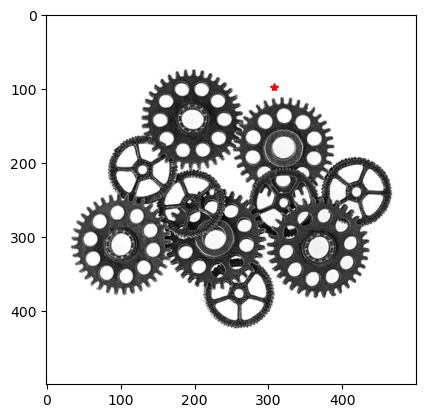

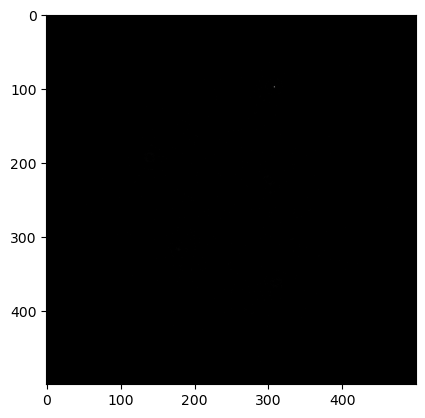

In [48]:
trybiki2 = cv2.imread('trybiki2.jpg', cv2.IMREAD_GRAYSCALE)
# trybiki2G = cv2.cvtColor(trybiki2, cv2.COLOR_BGR2GRAY)

# R_table = get_R_table(trybiki2)
sobelx2, sobely2 = get_gradients(trybiki2)
magnitude, gradient_ori = get_gradient_values(sobelx2, sobely2)

H = np.zeros_like(trybiki2).astype(np.float32)

for y in range(trybiki2.shape[0]):
    for x in range(trybiki2.shape[1]):
        if magnitude[y, x] > 0.5:
            orientation  =int(gradient_ori[y, x])
            for r, fi in R_table[orientation]:
                x1 = int(-r*np.cos(fi) + x)
                y1 = int(-r*np.sin(fi) + y)
                if 0 < x1 < H.shape[1] and 0 < y1 < H.shape[0]:
                    H[x1, y1] += 1

m_y, m_x = np.where(H.max() == H)
plt.plot([m_x], [m_y], '*', color='r')

plt.imshow(trybiki2, 'gray')
plt.show()
plt.imshow(H, 'gray')
plt.show()
